In [1]:
Retail=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\10. Forecasting Basics\\14.2 retail_clean.csv',parse_dates=True)

Retail.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [123]:
Retail.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000


In [124]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [125]:
Retail['InvoiceDate']=pd.to_datetime(Retail['InvoiceDate'])

<IPython.core.display.Javascript object>

In [126]:
Retail['Date']=Retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [127]:
Retail['Date']=pd.to_datetime(Retail['Date'])

<IPython.core.display.Javascript object>

In [128]:
Retail['Date']

0        2009-12-01
1        2009-12-01
2        2009-12-01
3        2009-12-01
4        2009-12-01
            ...    
779490   2011-12-09
779491   2011-12-09
779492   2011-12-09
779493   2011-12-09
779494   2011-12-09
Name: Date, Length: 779495, dtype: datetime64[ns]

In [129]:
Retail['Week']=Retail['Date'].dt.week
Retail['Year']=Retail['Date'].dt.year
Retail['Month']=Retail['Date'].dt.month

<ipython-input-129-34353bdb8ad7>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Retail['Week']=Retail['Date'].dt.week


In [204]:
Time_series=Retail.groupby(['Week','Month','Year']).agg(Date=('Date','first'),
                                                       total_sales=('Quantity',np.sum)).reset_index().sort_values('Date')

<IPython.core.display.Javascript object>

In [131]:
Time_series

,Week,Month,Year,Date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


In [205]:
Time_series['Trend']=range(Time_series.shape[0])

In [133]:
Time_series['Week']=Time_series['Week'].astype('category')

In [134]:
X=Time_series[['Trend','Week']]

In [136]:
y=Time_series['total_sales'].values

In [137]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
model=LinearRegression()

In [141]:
model.fit(X,y)

LinearRegression()

In [142]:
pred=model.predict(X)

In [143]:
mean_squared_error(y,pred)

687862405.712021

In [144]:
np.sqrt(mean_squared_error(y,pred))

<IPython.core.display.Javascript object>

26227.131099531663

In [146]:
Time_series['Forecast']=pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

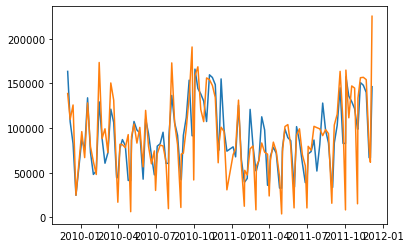

In [149]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [152]:
Time_series['Date'].max()

Timestamp('2011-12-05 00:00:00')

In [160]:
A=pd.DataFrame({'Date':pd.date_range('2011-12-06','2014-12-06',freq='W')})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
A

,Date
0,2011-12-11
1,2011-12-18
2,2011-12-25
3,2012-01-01
4,2012-01-08
...,...
151,2014-11-02
152,2014-11-09
153,2014-11-16
154,2014-11-23


In [166]:
Time_series=pd.concat([Time_series,A],axis=0)

<IPython.core.display.Javascript object>

In [168]:
Time_series['Week']=Time_series['Date'].dt.week

<ipython-input-168-d84a5d68c514>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Time_series['Week']=Time_series['Date'].dt.week


In [170]:
Time_series['Trend']=range(Time_series.shape[0])

In [171]:
Time_series

,Week,Month,Year,Date,total_sales,Trend,Forecast
113,49,12.0,2009.0,2009-12-01,138612.0,0,163373.609283
116,50,12.0,2009.0,2009-12-07,109644.0,1,107122.935316
118,51,12.0,2009.0,2009-12-14,125772.0,2,82485.435316
120,52,12.0,2009.0,2009-12-21,24680.0,3,24680.000000
0,1,1.0,2010.0,2010-01-04,95950.0,4,87184.631328
...,...,...,...,...,...,...,...
151,44,NaN,NaN,2014-11-02,NaN,272,NaN
152,45,NaN,NaN,2014-11-09,NaN,273,NaN
153,46,NaN,NaN,2014-11-16,NaN,274,NaN
154,47,NaN,NaN,2014-11-23,NaN,275,NaN


In [182]:
Time_series['Week']=Time_series['Week'].astype('category')

In [183]:
X=Time_series[['Trend','Week']]

In [184]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [187]:
pred=model.predict(X)

In [189]:
Time_series['Forecast']=pred

In [190]:
Time_series

,Week,Month,Year,Date,total_sales,Trend,Forecast
113,49,12.0,2009.0,2009-12-01,138612.0,0,163373.609283
116,50,12.0,2009.0,2009-12-07,109644.0,1,107122.935316
118,51,12.0,2009.0,2009-12-14,125772.0,2,82485.435316
120,52,12.0,2009.0,2009-12-21,24680.0,3,24680.000000
0,1,1.0,2010.0,2010-01-04,95950.0,4,87184.631328
...,...,...,...,...,...,...,...
151,44,NaN,NaN,2014-11-02,NaN,272,76027.041476
152,45,NaN,NaN,2014-11-09,NaN,273,128313.896370
153,46,NaN,NaN,2014-11-16,NaN,274,125334.896370
154,47,NaN,NaN,2014-11-23,NaN,275,117281.896370


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

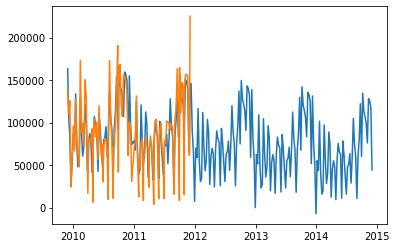

In [191]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [206]:
Time_series['Week']=Time_series['Week'].astype('category')
Time_series['Month']=Time_series['Month'].astype('category')

In [207]:
X=Time_series[['Trend','Week','Month']]

In [208]:
y=Time_series['total_sales'].values

In [209]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [210]:
model.fit(X,y)

LinearRegression()

In [211]:
pred=model.predict(X)

In [212]:
mean_squared_error(y,pred)

318071404.07337546

In [213]:
Time_series['Forecast']=pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

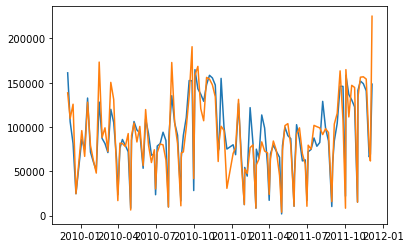

In [214]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [2]:
# ARIMA FORECASTING METHOD

In [1]:
# ARIMA